In [213]:
# import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import statsmodels.api as sm
import itertools
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

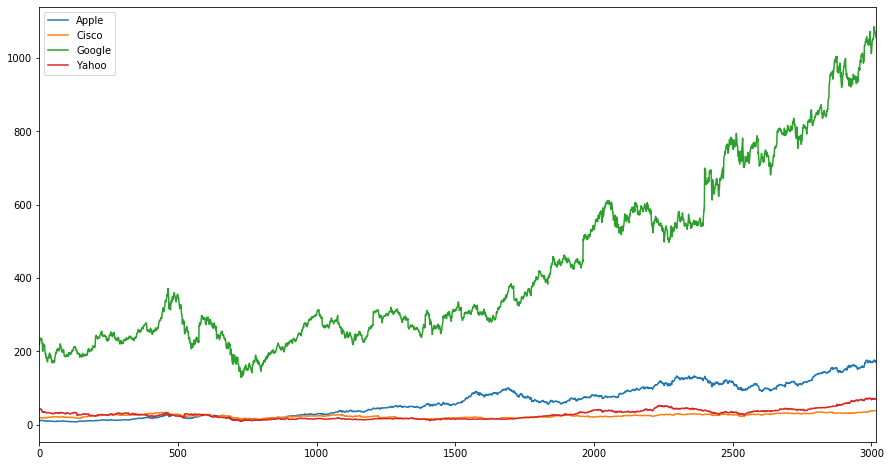

In [214]:
df_AAPL = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df_AAPL['Close'].plot(figsize =(15,8),label='Apple')
df_CSCO = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')
df_CSCO['Close'].plot(figsize =(15,8),label='Cisco')
df_GOOGL= pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
df_GOOGL['Close'].plot(figsize =(15,8),label='Google')
df_original = pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")
df_original['Close'].plot(figsize =(15,8),label='Yahoo')
plt.legend(loc = 'best')

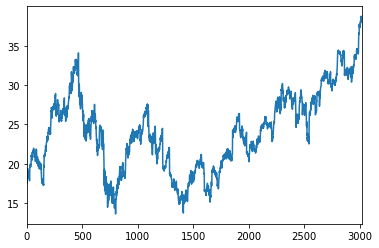

In [215]:
df_AAPL = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')
df_AAPL['Close'].plot()

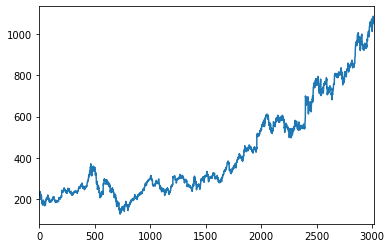

In [216]:
df_AAPL = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
df_AAPL['Close'].plot()

In [217]:
df_original = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')
df = df_original.copy()
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
1,2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2,2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
3,2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
4,2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO
...,...,...,...,...,...,...,...
3014,2017-12-22,38.52,38.74,38.47,38.55,11441622,CSCO
3015,2017-12-26,38.55,38.68,38.36,38.48,8186082,CSCO
3016,2017-12-27,38.54,38.65,38.45,38.56,10543034,CSCO
3017,2017-12-28,38.73,38.73,38.45,38.59,8807745,CSCO


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [219]:
df['Date'] = pd.to_datetime(df['Date'])

In [220]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
1,2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2,2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
3,2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
4,2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO


In [221]:
df.set_index('Date' , inplace =True )

In [222]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO


In [223]:
df.drop(['Open','High','Low','Volume','Name'],axis = 1 , inplace = True)

In [224]:
df.head()

,Close
Date,
2006-01-03,17.45
2006-01-04,17.85
2006-01-05,18.35
2006-01-06,18.77
2006-01-09,19.06


In [225]:
df.rename(columns={'Close':'Price'},inplace = True)

In [226]:
#resample 
df = df.resample('MS').sum()

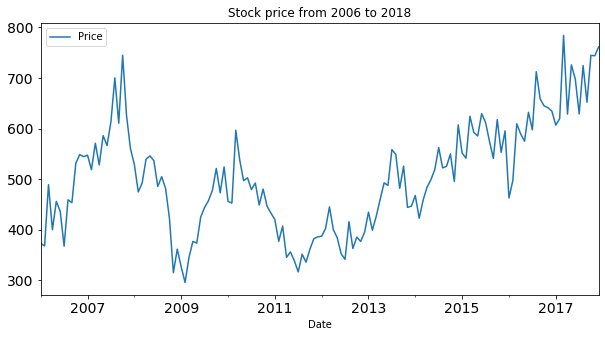

In [227]:
df.plot(figsize = (10,5),title = "Stock price from 2006 to 2018" , fontsize = 14)

## Component of Time Series Data 
 - Trend
 - Seasonality
 - Cyclical
 - Irregrular

<Figure size 576x360 with 0 Axes>

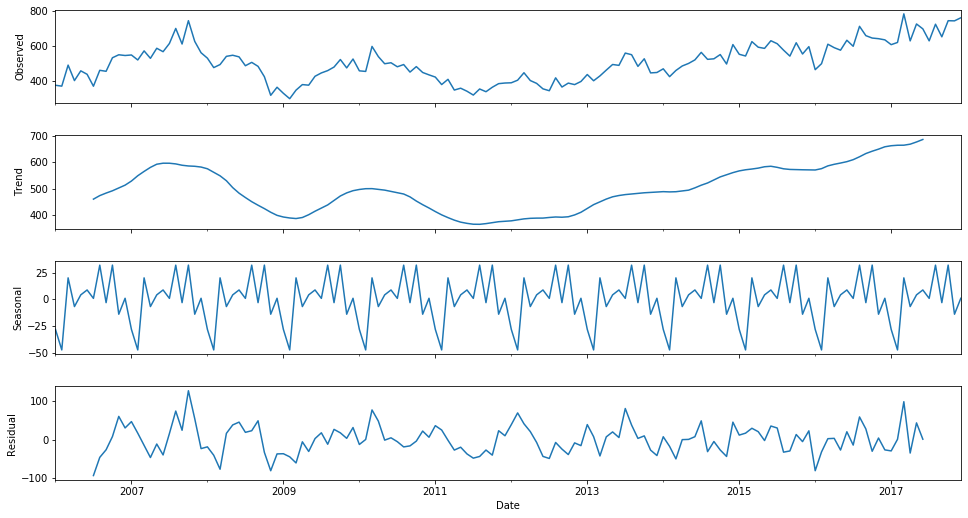

In [228]:
# decompose 

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,freq =12)
fig = plt.figure(figsize = (8,5))
fig = decomposition.plot()
fig.set_size_inches(15,8)

In [229]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries , window):
    #Determing rolling Statistics:
    rolmean = timeseries.rolling(window = window).mean()
    rolstd = timeseries.rolling(window = window).std()
    
    #plot rolling statistics
    fig = plt.figure(figsize = (10,5))
    plt.plot(timeseries,color ='blue',label = 'original')
    plt.plot(rolmean,color='red',label ='mean')
    plt.plot(rolstd,color='black',label ='std')
    plt.legend(loc ='best')
    plt.title("Rolling mean & std ")
    plt.show()
    
    # Dickey-Fuller Test:
    
    print("Result Dickey-Fuller Test")
    dftest = adfuller(timeseries,autolag ='AIC')
    
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','P-value','#Lags','No of obs'])
    for key,value in dftest[4].items():
        dfoutput[f"Critical_value { key }"] = value
    
    print(dfoutput)

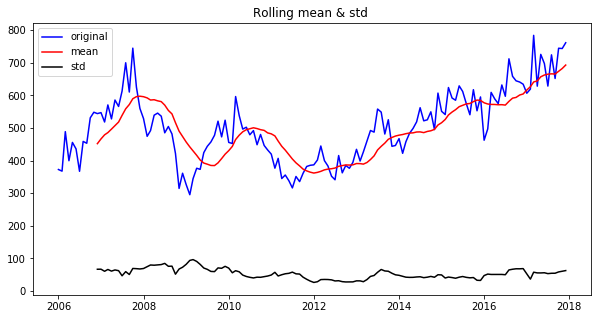

Result Dickey-Fuller Test
Test Statistic         -0.942235
P-value                 0.773746
#Lags                  13.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [230]:
test_stationarity(df.Price,12)

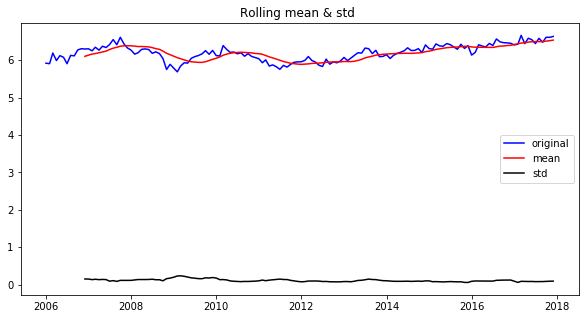

Result Dickey-Fuller Test
Test Statistic         -1.184139
P-value                 0.680381
#Lags                  13.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [231]:
#moving data with log
df['log'] = df['Price'].apply(lambda x:np.log(x))
test_stationarity(df['log'],12)    

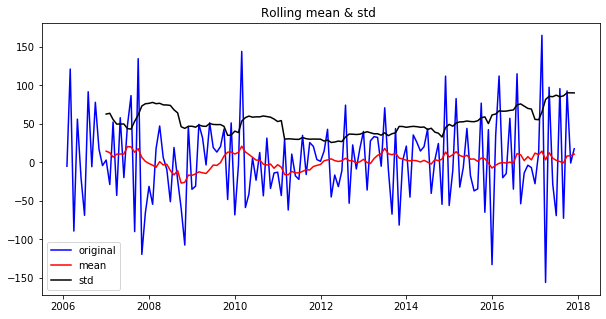

Result Dickey-Fuller Test
Test Statistic         -3.178752
P-value                 0.021248
#Lags                  12.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [232]:
# first differentiate
df['first_diff'] = df['Price'].diff()
df.dropna(inplace = True)
test_stationarity(df['first_diff'],12)

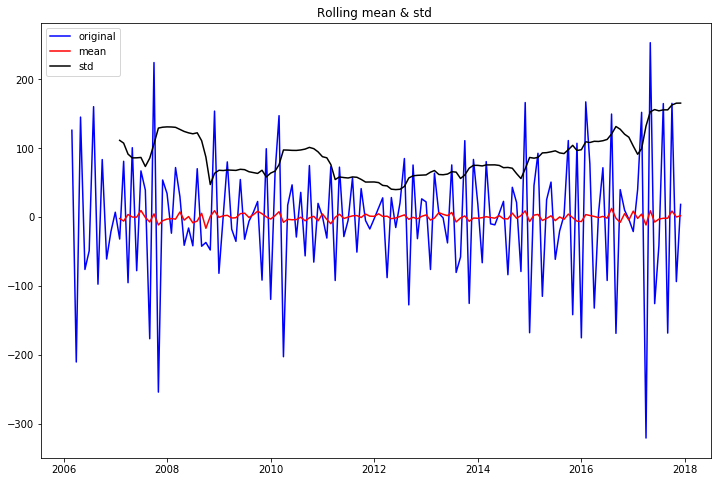

Result Dickey-Fuller Test
Test Statistic         -5.265935
P-value                 0.000006
#Lags                  11.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [142]:
df['seasonal_diff'] = df['first_diff'].diff()
df.dropna(inplace =True)
test_stationarity(df['seasonal_diff'],12)

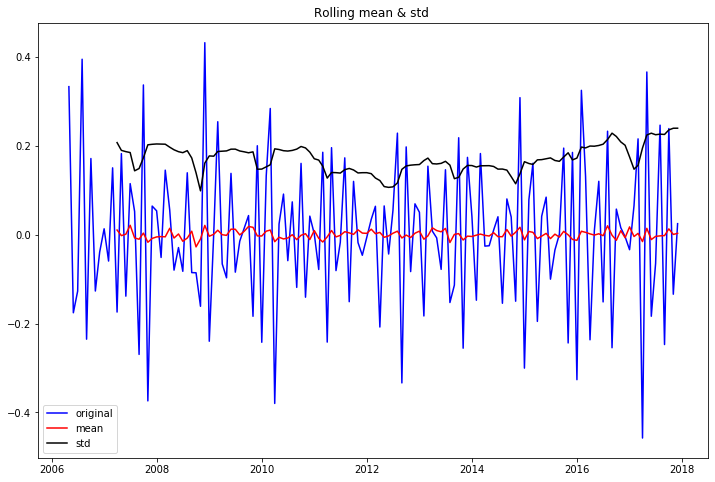

Result Dickey-Fuller Test
Test Statistic         -4.913831
P-value                 0.000033
#Lags                  11.000000
No of obs             128.000000
Critical_value 1%      -3.482501
Critical_value 5%      -2.884398
Critical_value 10%     -2.578960
dtype: float64


In [143]:
df['log_first_diff'] = df['log'].diff()
df['log_seasonal_first_diff'] = df['log_first_diff'].diff()
df.dropna(inplace =True)
test_stationarity(df['log_seasonal_first_diff'],12)


In [144]:
df

,Price,log,first_diff,seasonal_diff,log_first_diff,log_seasonal_first_diff
Date,,,,,,
2006-05-01,455.88,6.122230,56.11,145.29,0.131340,0.332711
2006-06-01,436.05,6.077757,-19.83,-75.94,-0.044473,-0.175813
2006-07-01,367.30,5.906179,-68.75,-48.92,-0.171578,-0.127105
2006-08-01,458.98,6.129007,91.68,160.43,0.222828,0.394406
2006-09-01,453.32,6.116598,-5.66,-97.34,-0.012408,-0.235236
...,...,...,...,...,...,...
2017-08-01,724.58,6.585592,95.81,164.92,0.141827,0.246108
2017-09-01,652.06,6.480137,-72.52,-168.33,-0.105456,-0.247282
2017-10-01,744.82,6.613143,92.76,165.28,0.133006,0.238462


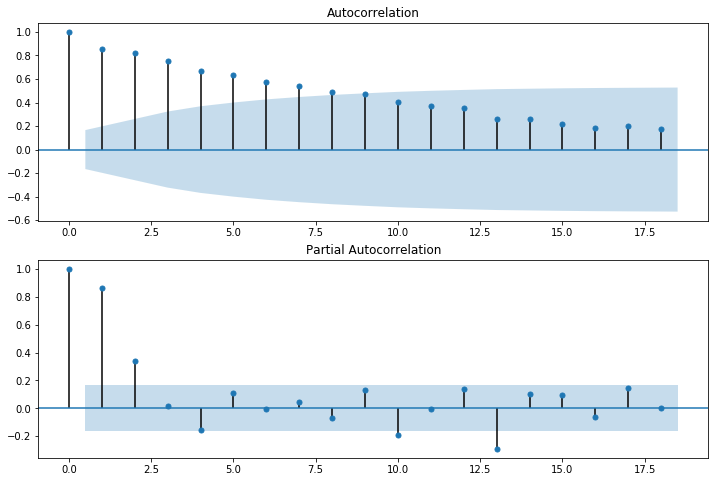

In [145]:
fig = plt.figure(figsize=(12,8))

ax1 =fig.add_subplot(211)
#acf
fig = sm.graphics.tsa.plot_acf(df.Price,lags=18,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Price,lags =18 ,ax =ax2)

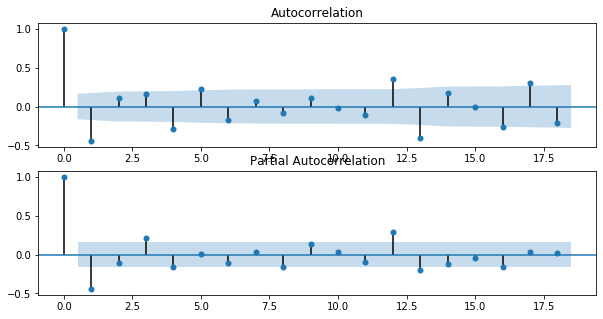

In [200]:
fig = plt.figure(figsize=(10,5))
ax1 =fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.first_diff,lags=18,ax=ax1)   #acf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.first_diff,lags =18 ,ax =ax2)   #pacf

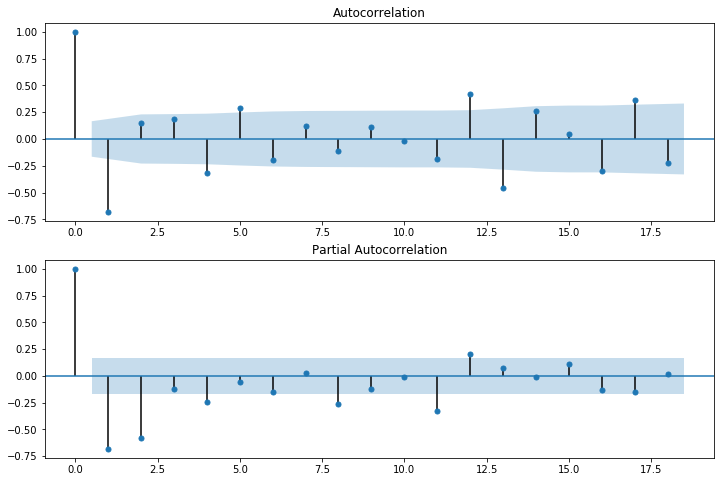

In [147]:
fig = plt.figure(figsize=(12,8))

ax1 =fig.add_subplot(211)
#acf
fig = sm.graphics.tsa.plot_acf(df.seasonal_diff,lags=18,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_diff,lags =18 ,ax =ax2)

In [237]:
mod = sm.tsa.statespace.SARIMAX(df.Price,trend='n', order=(1,1,1),seasonal_order=(1,1,1,12))
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -687.485
Date:                            Fri, 10 Jan 2020   AIC                           1384.971
Time:                                    02:09:15   BIC                           1399.309
Sample:                                02-01-2006   HQIC                          1390.797
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1506      0.307     -0.491      0.623      -0.751       0.450
ma.L1         -0.1302      0.306     -0.426      0.670      -0.730       0.469
ar.S.L12       0.1492      0.149      1.000      0.317      -0.143       0.442
ma.S.L12      -0.9927      3.274     -0.303      0.762      -7.409       5.424
sigma2      1886.9780   6054.585      0.312      0.755   -9979.790    1.38e+04
===================================================================================
Ljung-Box (Q):                       83.71   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               0.85   Skew:                            -0.19
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

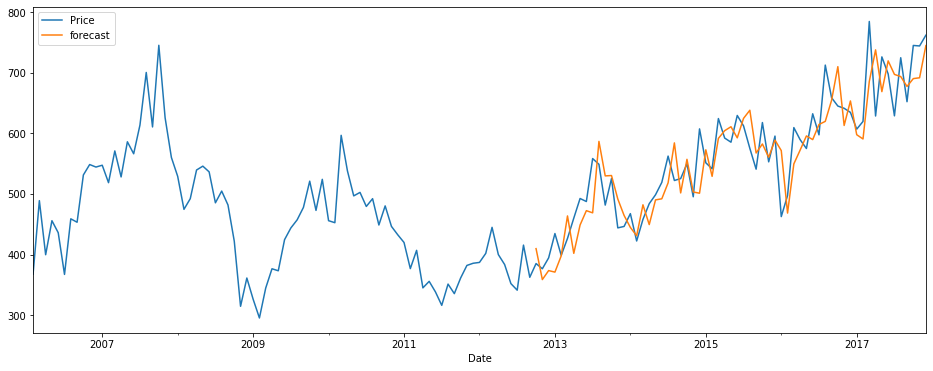

In [238]:
df['forecast'] = res.predict(start=80,end =150 ,dynamic = False)
df[['Price','forecast']].plot(figsize = (16,6))

In [150]:
df

,Price,log,first_diff,seasonal_diff,log_first_diff,log_seasonal_first_diff,forecast
Date,,,,,,,
2006-05-01,455.88,6.122230,56.11,145.29,0.131340,0.332711,NaN
2006-06-01,436.05,6.077757,-19.83,-75.94,-0.044473,-0.175813,NaN
2006-07-01,367.30,5.906179,-68.75,-48.92,-0.171578,-0.127105,NaN
2006-08-01,458.98,6.129007,91.68,160.43,0.222828,0.394406,NaN
2006-09-01,453.32,6.116598,-5.66,-97.34,-0.012408,-0.235236,NaN
...,...,...,...,...,...,...,...
2017-08-01,724.58,6.585592,95.81,164.92,0.141827,0.246108,696.880191
2017-09-01,652.06,6.480137,-72.52,-168.33,-0.105456,-0.247282,662.625998
2017-10-01,744.82,6.613143,92.76,165.28,0.133006,0.238462,675.588633


In [151]:
# predict

from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2020-01-31","%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
date_list

[datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 29, 0, 0),
 datetime.datetime(2020, 3, 31, 0, 0),
 datetime.datetime(2020, 4, 30, 0, 0),
 datetime.datetime(2020, 5, 31, 0, 0),
 datetime.datetime(2020, 6, 30, 0, 0),
 datetime.datetime(2020, 7, 31, 0, 0),
 datetime.datetime(2020, 8, 31, 0, 0),
 datetime.datetime(2020, 9, 30, 0, 0),
 datetime.datetime(2020, 10, 31, 0, 0),
 datetime.datetime(2020, 11, 30, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0)]

In [152]:
future  = pd.DataFrame(index = date_list,columns=df.columns)
df_future = pd.concat([df,future])
df_future

,Price,log,first_diff,seasonal_diff,log_first_diff,log_seasonal_first_diff,forecast
2006-05-01,455.88,6.122230,56.11,145.29,0.131340,0.332711,NaN
2006-06-01,436.05,6.077757,-19.83,-75.94,-0.044473,-0.175813,NaN
2006-07-01,367.30,5.906179,-68.75,-48.92,-0.171578,-0.127105,NaN
2006-08-01,458.98,6.129007,91.68,160.43,0.222828,0.394406,NaN
2006-09-01,453.32,6.116598,-5.66,-97.34,-0.012408,-0.235236,NaN
...,...,...,...,...,...,...,...
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# Let's use a systematic approach 
#to finding the order of AR and MA processes.
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
pdqs = [ (x[0],x[1],x[2],12) for x in pdq]
print("Order : ",pdq,'\n',"seasonal_order :", pdqs)

Order :  [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)] 
 seasonal_order : [(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [91]:
ans

[[(0, 0, 0), (0, 0, 0, 12), 2200.037364268144],
 [(0, 0, 0), (0, 0, 1, 12), 1904.995277614316],
 [(0, 0, 0), (0, 0, 2, 12), 1668.6722829555954],
 [(0, 0, 0), (0, 1, 0, 12), 1722.539266078314],
 [(0, 0, 0), (0, 1, 1, 12), 1569.2927963641796],
 [(0, 0, 0), (0, 1, 2, 12), 1398.2097064748186],
 [(0, 0, 0), (0, 2, 0, 12), 1615.732909715314],
 [(0, 0, 0), (0, 2, 1, 12), 1416.6988805776443],
 [(0, 0, 0), (0, 2, 2, 12), 1254.5107445048466],
 [(0, 0, 0), (1, 0, 0, 12), 1729.9459928222193],
 [(0, 0, 0), (1, 0, 1, 12), 1719.121091203251],
 [(0, 0, 0), (1, 0, 2, 12), 1536.7848223595815],
 [(0, 0, 0), (1, 1, 0, 12), 1583.5086430511958],
 [(0, 0, 0), (1, 1, 1, 12), 1568.0896413839396],
 [(0, 0, 0), (1, 1, 2, 12), 1398.6537942978327],
 [(0, 0, 0), (1, 2, 0, 12), 1454.9901893201172],
 [(0, 0, 0), (1, 2, 1, 12), 1418.6878733497988],
 [(0, 0, 0), (1, 2, 2, 12), 1251.524898741356],
 [(0, 0, 0), (2, 0, 0, 12), 1577.7140388172763],
 [(0, 0, 0), (2, 0, 1, 12), 1550.4289989872425],
 [(0, 0, 0), (2, 0, 2, 12)

In [92]:
df_ans = pd.DataFrame(ans , columns=['pdq','pdqs','aic'])
df_ans

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",2200.037364
1,"(0, 0, 0)","(0, 0, 1, 12)",1904.995278
2,"(0, 0, 0)","(0, 0, 2, 12)",1668.672283
3,"(0, 0, 0)","(0, 1, 0, 12)",1722.539266
4,"(0, 0, 0)","(0, 1, 1, 12)",1569.292796
...,...,...,...
724,"(2, 2, 2)","(2, 1, 1, 12)",1147.727387
725,"(2, 2, 2)","(2, 1, 2, 12)",1132.112883
726,"(2, 2, 2)","(2, 2, 0, 12)",1058.385461
727,"(2, 2, 2)","(2, 2, 1, 12)",1050.485377


In [93]:
df_ans.loc[df_ans.aic.idxmin]

pdq         (2, 2, 2)
pdqs    (0, 2, 2, 12)
aic           1031.25
Name: 710, dtype: object

In [94]:
# fitting model

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df.Price,
                                        order=(2,2,2),
                                       seasonal_order=(0,2,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
output = ARIMA_MODEL.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  140
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -508.624
Date:                            Thu, 09 Jan 2020   AIC                           1031.248
Time:                                    22:25:39   BIC                           1048.510
Sample:                                05-01-2006   HQIC                          1038.199
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9261      0.227     -4.086      0.000      -1.370      -0.482
ar.L2         -0.3325      0.104     -3.211      0.001      -0.536      -0.130
ma.L1         -0.2011      0.210     -0.957      0.339      -0.613       0.211
ma.L2         -0.5968      0.197     -3.024      0.002      -0.984      -0.210
ma.S.L12      -1.3084      0.251     -5.221      0.000      -1.800      -0.817
ma.S.L24       0.4072      0.127      3.198      0.001       0.158       0.657
sigma2      6334.5031   1565.433      4.046      0.000    3266.310    9402.696
===================================================================================
Ljung-Box (Q):                       47.54   Jarque-Bera (JB):                 5.26
Prob(Q):                              0.19   Prob(JB):                         0.07
Heteroskedasticity (H):               9.60   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

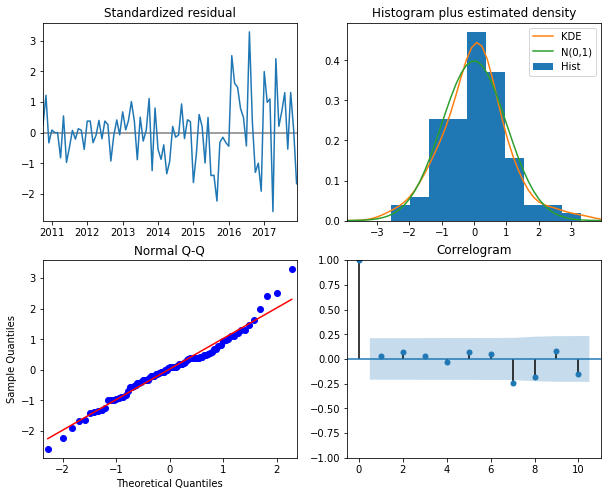

In [211]:
output.plot_diagnostics(figsize =(10,8))
plt.show()

In [36]:
df['2006']

,Price,log,first_diff,seasonal_diff,log_first_diff,log_seasonal_first_diff,forecast
Date,,,,,,,
2006-01-09,43.42,3.770920,0.21,-1.47,0.004848,-0.034808,NaN
2006-01-10,42.98,3.760735,-0.44,-0.65,-0.010185,-0.015033,NaN
2006-01-11,41.87,3.734570,-1.11,-0.67,-0.026165,-0.015980,NaN
2006-01-12,40.89,3.710886,-0.98,0.13,-0.023684,0.002481,NaN
2006-01-13,39.90,3.686376,-0.99,-0.01,-0.024509,-0.000825,NaN
...,...,...,...,...,...,...,...
2006-12-22,25.55,3.240637,0.07,0.18,0.002743,0.007051,NaN
2006-12-26,25.45,3.236716,-0.10,-0.17,-0.003922,-0.006665,NaN
2006-12-27,25.75,3.248435,0.30,0.40,0.011719,0.015640,NaN


In [112]:
predict =output.get_prediction(dynamic = '2007-01-01')
predict_ci = pred.conf_int()

In [113]:
predict_dy =output.get_prediction(dynamic = '2007-01-01')
predict_dy_ci = pred.conf_int()

AttributeError: 'PredictionResults' object has no attribute 'plot'

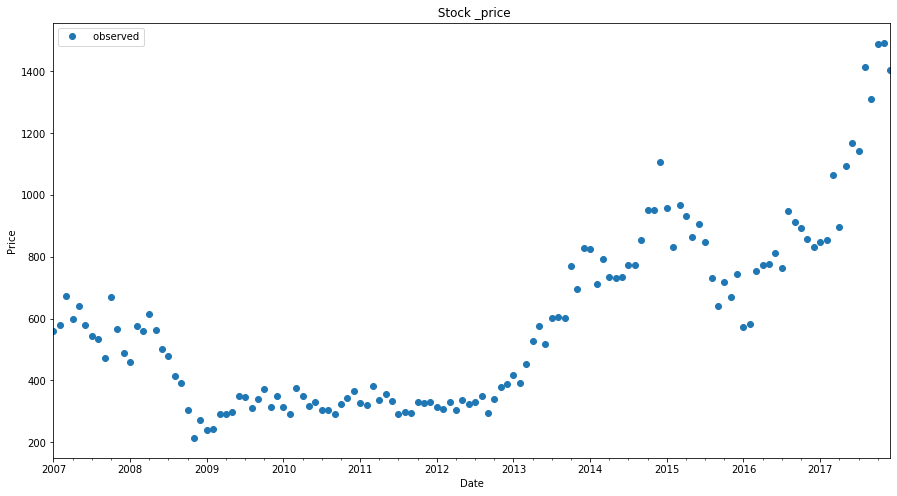

In [116]:
# graph

fig ,ax = plt.subplots(figsize =(15,8))

ax.set(title = " Stock _price", xlabel = "Date" , ylabel = "Price")

df.loc['2007-01-01':,'Price'].plot(ax =ax ,style ='o' ,label = " observed")
legend =ax.legend(loc = 'best')

predict.plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2007-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['2007-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)


In [44]:
import statsmodels.tsa.api as smt

In [51]:
"""
# checking order

best_aic = 5718.23
#best_aic
best_order =None
best_md1 = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            temp_md1 = smt.ARMA(df,order=(i,j)).fit(method ='mle',
                                                   trend ='nc')
            tmp_aic = temp_md1.aic
            if tmp_aic < best_aic:
                best_aic =tmp_aic
                best_order =(i,j)
                best_md1 = temp_md1
        except: continue
            
print(f" aic {best_aic} and order : {best_order}" )  


"""

'\n# checking order\n\nbest_aic = 5718.23\n#best_aic\nbest_order =None\nbest_md1 = None\n\nrng = range(5)\nfor i in rng:\n    for j in rng:\n        try:\n            temp_md1 = smt.ARMA(df,order=(i,j)).fit(method =\'mle\',\n                                                   trend =\'nc\')\n            tmp_aic = temp_md1.aic\n            if tmp_aic < best_aic:\n                best_aic =tmp_aic\n                best_order =(i,j)\n                best_md1 = temp_md1\n        except: continue\n            \nprint(f" aic {best_aic} and order : {best_order}" )  \n\n\n'

Text(0, 0.5, 'Price')

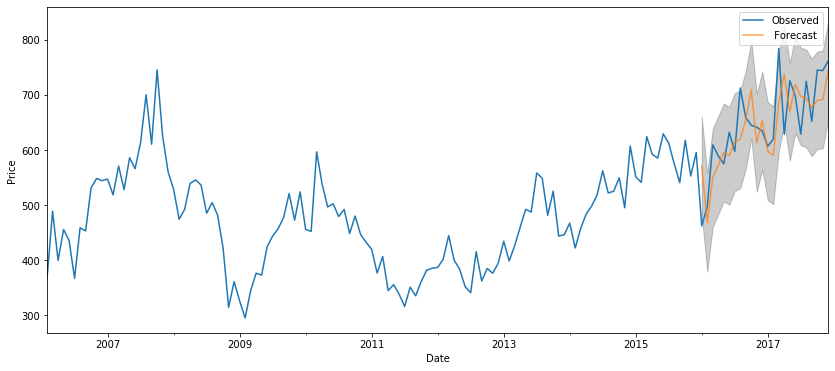

In [261]:
#predicting 
predict = result.get_prediction(start = pd.to_datetime('2016-01-01'),dynamic = False)
predict_ci = predict.conf_int()
ax = df.Price.plot(label = 'Observed',figsize = (14,6))
predict.predicted_mean.plot(ax =ax , label =" Forecast",alpha = .7)
ax.fill_between(predict_ci.index,predict_ci.iloc[:,0],
               predict_ci.iloc[:,1],color = 'k',alpha = .2)
plt.legend(loc = 'best')
ax.set_ylabel('Price')

Text(0, 0.5, 'Price')

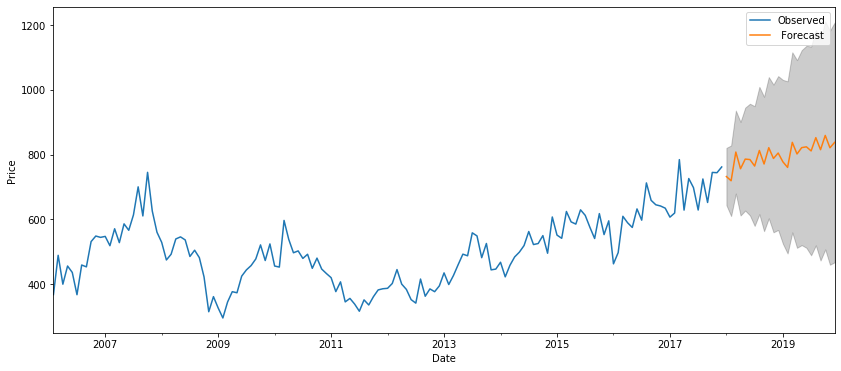

In [260]:
#predicting 
predict_uc  = result.get_forecast(steps =24)
predict_uc_ci = predict_uc.conf_int()
ax = df.Price.plot(label = 'Observed',figsize = (14,6))
predict_uc.predicted_mean.plot(ax =ax , label =" Forecast")
ax.fill_between(predict_uc_ci.index,predict_uc_ci.iloc[:,0],
               predict_uc_ci.iloc[:,1],color = 'k',alpha = .2)
plt.legend(loc = 'best')
ax.set_ylabel('Price')

In [263]:
#calculating error mse and rmse
df_predict = predict.predicted_mean
df_truth = df.Price['2016-01-01':]
mse = ((df_predict-df_truth)**2).mean()
root_mse = round(np.sqrt(mse),2)
print(f" The Mean Squared Error is {round(mse,2)}")
print(f" The Root Mean Square Error is {root_mse}")
                                          

 The Mean Squared Error is 2988.58
 The Root Mean Square Error is 54.67


In [268]:
df_predict = predict.predicted_mean
df_predict_truth = pd.DataFrame(df_predict,columns = ['Predict_price'])
df_predict_truth['Truth_price'] = df_truth
df_predict_truth


,Predict_price,Truth_price
Date,,
2016-01-01,571.499825,462.63
2016-02-01,468.451331,497.26
2016-03-01,549.537430,609.39
2016-04-01,572.251551,589.46
2016-05-01,595.631756,574.93
2016-06-01,589.595824,632.17
2016-07-01,614.494093,597.45
2016-08-01,619.665493,712.43
2016-09-01,654.313532,658.68


In [254]:
# Forecasting Cisco stock Price upto 12 month.
forecast = predict_uc.predicted_mean
forecast

2018-01-01    732.082338
2018-02-01    719.067453
2018-03-01    807.740291
2018-04-01    756.245860
2018-05-01    785.969956
2018-06-01    784.495380
2018-07-01    764.523016
2018-08-01    812.580398
2018-09-01    770.858794
2018-10-01    821.212631
2018-11-01    787.930170
2018-12-01    804.748397
Freq: MS, dtype: float64